# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [1]:
#import numpy and pandas
import numpy as np 
import pandas as pd 
import scipy


# Challenge 1 - The `stats` Submodule

This submodule contains statistical functions for conducting hypothesis tests, producing various distributions and other useful tools. Let's examine this submodule using the KickStarter dataset. Load the data using Ironhack's database (db: kickstarter, table: projects).

In [37]:
kickstarters_df = pd.read_csv('datasets/kickstarter_projects.csv', index_col=1)

Now print the `head` function to examine the dataset.

In [42]:
kickstarters_df = kickstarters_df.iloc[:,1:] #we remove the unnamed:0 column that comes from the csv file. 

In [43]:
kickstarters_df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
index,,,,,,,,,,,,,,,
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.0
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.0
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.0
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.0
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.0,successful,224,US,52375.0,52375.0,50000.0


Import the `mode` function from `scipy.stats` and find the mode of the `country` and `currency` column.

In [18]:
from scipy import stats

stats.mode(kickstarters_df['country']) #mode calculation for country column

ModeResult(mode=array(['US'], dtype=object), count=array([292627]))

The mode of the column Country is US with a total count of 292567 times. 

In [19]:
stats.mode(kickstarters_df['currency']) #mode calculation for currency column. 


ModeResult(mode=array(['USD'], dtype=object), count=array([295365]))

The mode of the column Country is USD with a total count of 295365 times. 

The trimmed mean is a function that computes the mean of the data with observations removed. The most common way to compute a trimmed mean is by specifying a percentage and then removing elements from both ends. However, we can also specify a threshold on both ends. The goal of this function is to create a more robust method of computing the mean that is less influenced by outliers. SciPy contains a function called `tmean` for computing the trimmed mean. 

In the cell below, import the `tmean` function and then find the 75th percentile of the `goal` column. Compute the trimmed mean between 0 and the 75th percentile of the column. Read more about the `tmean` function [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.tmean.html#scipy.stats.tmean).

In [53]:
#we define the quartile 0,75 to look for the threshold value. 
q3_value = kickstarters_df['goal'].quantile(0.75)

In [64]:
# we perform the mean of the entire column
kickstarters_df['goal'].mean()

49080.91849672528

In [70]:
#we perform the trimmed mean removing the outliers above the 75% 
stats.tmean(kickstarters_df['goal'], (0,q3_value))

4874.1639015399105

From here we can see that the mean without removing the outliers is much more greater than when we remove the outliers greater than 75% 

#### SciPy contains various statistical tests. One of the tests is Fisher's exact test. This test is used for contingency tables. 

The test originates from the "Lady Tasting Tea" experiment. In 1935, Fisher published the results of the experiment in his book. The experiment was based on a claim by Muriel Bristol that she can taste whether tea or milk was first poured into the cup. Fisher devised this test to disprove her claim. The null hypothesis is that the treatments do not affect outcomes, while the alternative hypothesis is that the treatment does affect outcome. To read more about Fisher's exact test, see:

* [Wikipedia's explanation](http://b.link/test61)
* [A cool deep explanation](http://b.link/handbook47)
* [An explanation with some important Fisher's considerations](http://b.link/significance76)

Let's perform Fisher's exact test on our KickStarter data. We intend to test the hypothesis that the choice of currency has an impact on meeting the pledge goal. We'll start by creating two derived columns in our dataframe. The first will contain 1 if the amount of money in `usd_pledged_real` is greater than the amount of money in `usd_goal_real`. We can compute this by using the `np.where` function. If the amount in one column is greater than the other, enter a value of 1, otherwise enter a value of zero. Add this column to the dataframe and name it `goal_met`.

In [72]:
#null hypotheses Ho → the choice of currency does not has an impact on meeting the pledged goal. 

#we create the column goal_met
kickstarters_df['goal_met'] = np.where(kickstarters_df['usd_pledged_real'] > kickstarters_df['usd_goal_real'], 1,0)

Next, create a column that checks whether the currency of the project is in US Dollars. Create a column called `usd` using the `np.where` function where if the currency is US Dollars, assign a value of 1 to the row and 0 otherwise.

In [73]:
kickstarters_df['usd'] = np.where(kickstarters_df['currency']=='USD' , 1,0) #we write 1 if the currency is in USD and 0 otherwise. 

In [75]:
kickstarters_df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,goal_met,usd
index,,,,,,,,,,,,,,,,,
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.0,0,1
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.0,0,1
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.0,0,1
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.0,0,1
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.0,successful,224,US,52375.0,52375.0,50000.0,1,1


Now create a contingency table using the `pd.crosstab` function in the cell below to compare the `goal_met` and `usd` columns.

Import the `fisher_exact` function from `scipy.stats` and conduct the hypothesis test on the contingency table that you have generated above. You can read more about the `fisher_exact` function [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.fisher_exact.html#scipy.stats.fisher_exact). The output of the function should be the odds ratio and the p-value. The p-value will provide you with the outcome of the test.

In [77]:
df = pd.crosstab(kickstarters_df.goal_met, kickstarters_df.usd) #crosstable creation. 

In [79]:
df

usd,0,1
goal_met,,
0,58684,187130
1,24611,108235


In [80]:
stats.fisher_exact(df) #calculation of the fisher exact test p-value

(1.3791603148441902, 1.1354e-320)

`Insights`:

$H_o$: the choice of currency does not has an impact on the goal met 

$H_A$ : the choice of currency has an impact on the goal met

With a pvalue of 1.135e-320, that means nearly 0, we can reject the null hypotheses with a CI of 95%. 

# Challenge 2 - The `interpolate` submodule

This submodule allows us to interpolate between two points and create a continuous distribution based on the observed data.

In the cell below, import the `interp1d` function and first take a sample of 10 rows from `kickstarter`. 

In [108]:
from scipy import interpolate

kick_sample = kickstarters_df.sample(10) #we choose a sample of 10 in our kickstarter dataframe. 

Next, create a linear interpolation of the backers as a function of `usd_pledged_real`. Create a function `f` that generates a linear interpolation of backers as predicted by the amount of real pledged dollars.

In [105]:
#linear interpolation between backers and usd_pledged_real. in this case our x is usd_pledged_real and f(x)=y 
#is  backers. 

f= interpolate.interp1d(x=kick_sample.usd_pledged_real, y=kick_sample.backers) 

Now create a new variable called `x_new`. This variable will contain all integers between the minimum number of backers in our sample and the maximum number of backers. The goal here is to take the dataset that contains few obeservations due to sampling and fill all observations with a value using the interpolation function. 

Hint: one option is the `np.arange` function.

In [110]:
x_new = np.arange(kick_sample.backers.min(), kick_sample.backers.max(),1)

Plot function f for all values of `x_new`. Run the code below.

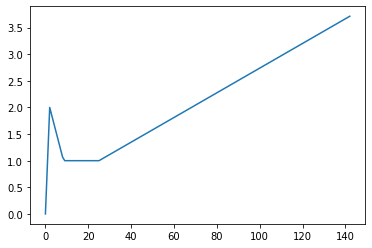

In [111]:
# Run this code:

%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(x_new, f(x_new))
plt.show()

Next create a function that will generate a cubic interpolation function. Name the function `g`.

In [112]:
g= interpolate.interp1d(x=kick_sample.usd_pledged_real, y=kick_sample.backers, kind='cubic')


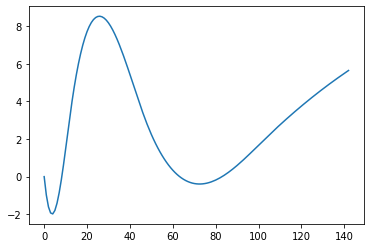

In [113]:
# Run this code:

plt.plot(x_new, g(x_new))

# Bonus Challenge - The Binomial Distribution

The binomial distribution allows us to calculate the probability of k successes in n trials for a random variable with two possible outcomes (which we typically label success and failure).  

The probability of success is typically denoted by p and the probability of failure is denoted by 1-p.

The `scipy.stats` submodule contains a `binom` function for computing the probabilites of a random variable with the binomial distribution. You may read more about the binomial distribution [here](http://b.link/binomial55)

* In the cell below, compute the probability that a dice lands on 5 exactly 3 times in 8 tries.


`assumptions:`
- the probability of success is 1/5
- the probability of failure is 5/6

`values:`
- p: chanche of a 5 on the dice → 1/6
- k: choices we want → 3
- total choices → 8

In [121]:
n = 8
p = 1/6
k = 3
scipy.stats.binom.pmf(k,n,p)

0.10419048163389728

We have a 10% of probabilities to have this situation where 5 lands exactly 3 times on our dice.

* Do a simulation for the last event: do a function that simulate 8 tries and return a 1 if the result is 5 exactly 3 times and 0 if not. Now launch your simulation.

In [134]:
import random


#function definition with 8 tries on rolling a dice

def eight_tries():
    lst=[]
    for i in range(8):
        lst.append(random.randint(1,7))
    if lst.count(5)==3:
        #print(lst)
        return 1
    else:
        #print(lst)
        return 0
    

In [137]:
eight_tries()

0

* Launch 10 simulations and represent the result in a bar plot. Now launch 1000 simulations and represent it. What do you see?

([<matplotlib.axis.XTick at 0x7f3886f4ea20>,
 <a list of 2 Text xticklabel objects>)

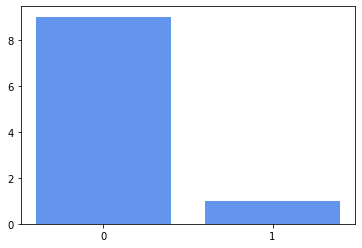

In [154]:
import matplotlib.pyplot as plt

dice= pd.DataFrame([eight_tries() for i in range(10)])

plt.bar(dice[0].value_counts().index, dice[0].value_counts(), color='cornflowerblue')

plt.xticks(dice[0].value_counts().index, ['0', '1'])

([<matplotlib.axis.XTick at 0x7f3886f71e80>,
 <a list of 2 Text xticklabel objects>)

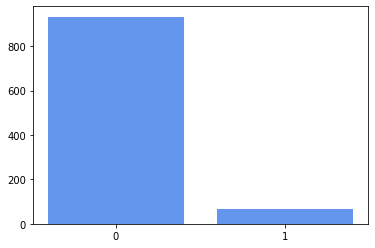

In [155]:
dice_1000= pd.DataFrame([eight_tries() for i in range(1000)])

plt.bar(dice_1000[0].value_counts().index, dice_1000[0].value_counts(), color='cornflowerblue')

plt.xticks(dice_1000[0].value_counts().index, ['0', '1'])

When we launch only 10 simulations, we can see that sometimes we don't get any result where we have exactly 3 times 5, but we can see other situations where we find one out of 10 where we have 3 times 5. However, when we launch 1000 simulations we can see that there is a 10% probability to see that there is 3 times 5 on our dice. 